In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from discrete_basics import *
from discrete_plot import *
from discrete_sim import *
from scipy.integrate import solve_ivp
from cycler import cycler

plt.rcParams['axes.prop_cycle']=cycler('color',['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
mpl.rcParams['backend'] = 'pdf'
mpl.rc('font',**{'family':'serif'})
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb,amsmath,wasysym}')
plt.rcParams['font.size'] = 14

location = "coupstrength/"
try:
    os.makedirs(location)
except:
    pass

# Fig 12

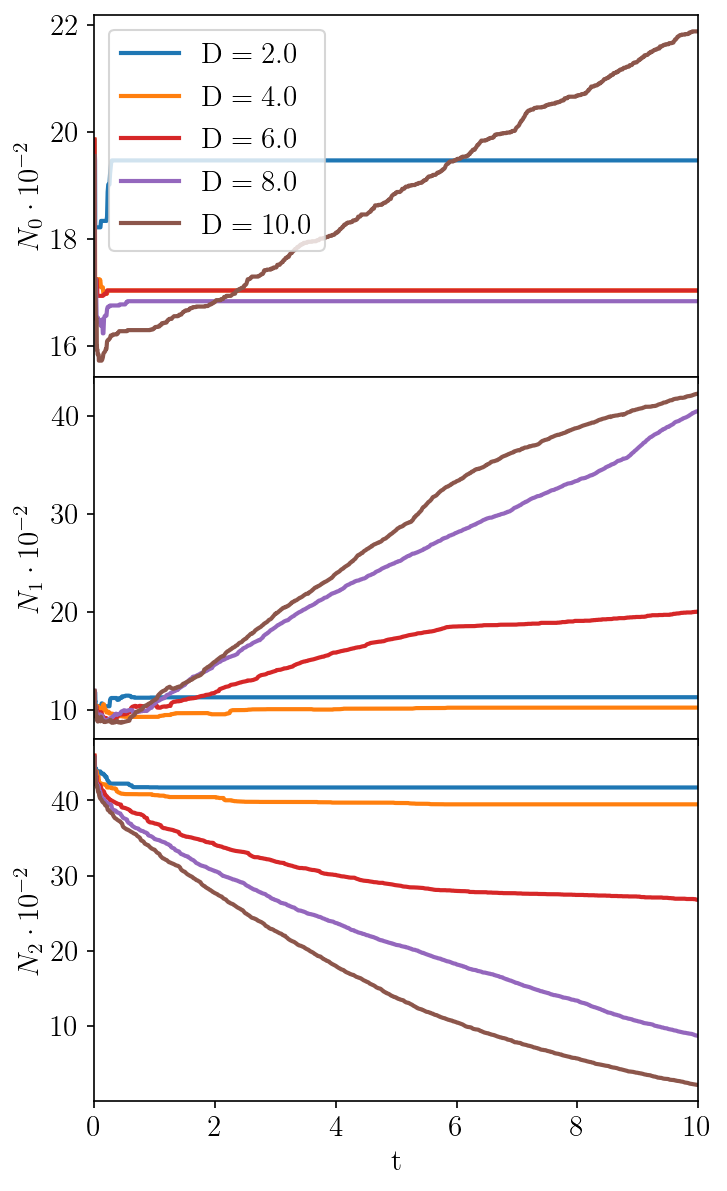

In [13]:
a, b = -10, 2
resolution = 100
dx = 1.0
tol = 0.1
coupArr = [2,4,6,8,10]

for par in [(18.75,-3)]:
    c,d = par
    solutions = minima(a,b,c,d)
    for method in [(mesh_tri, rhs_tri)]:#
        res, xv, yv = method[0](resolution)
        z = inioct(res,xv,yv,solutions,resolution)
        for coup in coupArr:#
            diff = coup*dx**2
            print("coup = {}".format(coup),end='\r')
            z1 = z.flatten()
            timeplus=0
            filename = method[0].__name__[-3:]+"_a{}_b{}_c{}_d{}_D{}_dx{}_r{}".format(a,b,c,d,diff,dx,resolution)
            if not os.path.isfile(location+filename+".txt"):
                for tlimit in [(0.1,0.001),(10,0.01)]:
                    tstep = tlimit[1]
                    t = 0
                    while (t*tstep+timeplus)<tlimit[0]:
                        try:
                            reso = solve_ivp(method[1],[0,tstep],z1,'LSODA',args=((a,b,c,d,diff,dx,res),))
                            z1 = reso.y[:,-1]
                            t = t+1
                        except(MemoryError):
                            fig, ax = plt.subplots(1,1,figsize = (1,1))
                            plt.close()
                        N_1, N_2, N_3 = len(z1[np.abs(z1-solutions[0])<tol]), len(z1[np.abs(z1-solutions[1])<tol]), len(z1[np.abs(z1-solutions[2])<tol])
                        f = open(location+filename+'.txt','a')
                        f.write("{}\t{}\t{}\t{}\t{}\n".format(t*tstep+timeplus,N_1,N_2,N_3,np.sum(z1-z.flatten())))
                        f.close()
                    timeplus = timeplus+t*tstep
        fig, axs = plt.subplots(3,1,figsize=(5,8),sharex=True,dpi=150)
        fig.tight_layout()
        fig.subplots_adjust(hspace=0)
        for coup in coupArr:#
            diff = coup*dx**2#
            filename = method[0].__name__[-3:]+"_a{}_b{}_c{}_d{}_D{}_dx{}_r{}".format(a,b,c,d,diff,dx,resolution)
            data1 = np.loadtxt(location+filename+'.txt')
            axs[0].plot(data1[:,0],data1[:,1]/1e2,label=r'$\mathrm{D}='+str(diff)+'$',lw=2)
            axs[1].plot(data1[:,0],data1[:,2]/1e2,label=r'$\mathrm{D}='+str(diff)+'$',lw=2)
            axs[2].plot(data1[:,0],data1[:,3]/1e2,label=r'$\mathrm{D}='+str(diff)+'$',lw=2)
        axs[0].set_ylabel(r'$N_{0} \cdot 10^{-2}$')
        axs[1].set_ylabel(r'$N_{1} \cdot 10^{-2}$')
        axs[2].set_ylabel(r'$N_{2} \cdot 10^{-2}$')
        axs[2].set_xlabel(r't')
        axs[0].set_xlim(0,10)
        axs[1].set_xlim(0,10)
        axs[2].set_xlim(0,10)
        axs[0].legend() #,bbox_inches='tight'
        #plt.tight_layout()
        #plt.legend(title=r'$\mathrm{D}=$')
        filename = location+'12_'+method[0].__name__[-3:]+"_a{}_b{}_c{}_d{}_dx{}_r{}".format(a,b,c,d,dx,resolution)
        fig.savefig(filename+'_coup.pdf',bbox_inches='tight')
        plt.show()  
